# Massive Data Analysis - HW1
## Ehsan Ghasemi - 98102108

In [1]:
# import our needed libraries
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("HW1") \
    .master("local[*]") \
    .getOrCreate()

sc=spark.sparkContext

24/01/08 17:40:49 WARN Utils: Your hostname, ehsan-Nitro-AN515-54 resolves to a loopback address: 127.0.1.1; using 192.168.166.235 instead (on interface wlp8s0)
24/01/08 17:40:49 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/08 17:40:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# reading records from the file
data = sc.textFile('news_data.jsonl')


# define our variables 
my_counter = 1
n = 5

# data = data.take(n)
# data = sc.parallelize(data)

In [3]:
# show first data with no process
# data.take(my_counter)

In [4]:
import json

json.loads(data.take(1)[0]).keys()

dict_keys(['body', 'image_title_url', 'language', 'source', 'title', 'date_published', 'uid', 'url', 'crawler_timestamp', 'ingestor_timestamp', 'summary', 'hostname', 'parser_categories', 'keywords', 'parser_keyword', 'author', 'processed_body', 'categories', 'ner_tags'])

In [5]:
import numpy as np
from operator import add

In [6]:
import json
import re
import matplotlib.pyplot as plt
from itertools import chain
from operator import add


def clean_page(page):
    
    replacements = {i: ' ' for i in chain(range(33, 64), range(123, 128), range(0, 32), range(91, 97))}
    replacements.update({ord('\n'): ' ',  ord('\u200c'): ' ', ord('\u200e'): ' ',
        ord('\u200d'): ' ', ord('–'): ' ', ord('_'): ' ', ord('،'): ' ', ord('.'): ' ',
        ord('•'): ' ', ord('\n'): ' ', ord('\U0001fa75'): ' ', ord('”'): ' ', ord('“'): ' '
    })
    
    # page['processed_body'] = re.sub(' {2,}', ' ', page['processed_body'].translate(replacements)).strip()
    page['body'] = re.sub(' {2,}', ' ', page['body'].translate(replacements)).strip()
    return page

def extract_word(page):
    text = page['body'] 
    return text.strip().split(' ')


# articles_rdd = data.map(json.loads).sample(
#     withReplacement=True,
#     fraction=0.01
# ).filter(lambda x: len(x['body']) > 0 )

articles_rdd = data.map(json.loads).filter(lambda x: len(x['body']) > 0 )

cleansed_articles_rdd = articles_rdd.map(clean_page)
words_rdd = cleansed_articles_rdd.flatMap(extract_word)
words_count_rdd = words_rdd.map(lambda x:(x, 1)).reduceByKey(add)
top_words = words_count_rdd.sortBy(lambda x: x[1], ascending=False)

# show json format of data
articles_rdd.take(my_counter)

[{'body': 'سرمربی ملوان درباره تصاویر وایرالی دیدار با نساجی یک پست جالب منتشر کرد.\n\nبه گزارش "ورزش سه"، مهدی تارتار با خوشحالی عجیب و غریب دقیقه ۹۰+۳ یکی از چهرههای جالب این هفته لیگ برتر را به خود اختصاص داد که موردتوجه هواداران فوتبال قرار گرفت.\n\nتارتار حالا با انتشار یک پست اینستاگرامی از تصاویر جشن و خوشحالی خود نوشته که این جادوی طرفداران انزلی است که او را از خود بی خود کرده است.\n\nسرمربی ملوان همچنین وعده داده که تیمش در ادامه فصل نیز با تمام توان خواهد جنگید تا رضایت هواداران را به خود جلب کند.\n\nنوشته او را در ادامه میخوانید:\n\nحالا که به عکسها نگاه میکنم، متحیر میشوم. یادم نمیآید هرگز اینطور شوری گرفته باشم. این جادوی شماست، شما که روی سکو آنچنان حس و انرژی به ما میدهید که لحظه پیروزی برایمان وصفناشدنی باشد. از روی سکوها تا لب خط، از پای تلویزیونها تا در مستطیل سبز؛ ما همدل و یکصدا پیش میرویم. باهم میجنگیم و باهم میخندیم و هرروز تلاش میکنیم تا این خنده را روی صورت شما نگه داریم. این پیروزی برای شماست، شما مردان نیک روی چمن و شما مردمان نیک روی سکو \U0001fa75🤍',
  'ima

In [7]:
# show cleaned data
cleansed_articles_rdd.take(my_counter)

[{'body': 'سرمربی ملوان درباره تصاویر وایرالی دیدار با نساجی یک پست جالب منتشر کرد به گزارش ورزش سه مهدی تارتار با خوشحالی عجیب و غریب دقیقه ۹۰ ۳ یکی از چهرههای جالب این هفته لیگ برتر را به خود اختصاص داد که موردتوجه هواداران فوتبال قرار گرفت تارتار حالا با انتشار یک پست اینستاگرامی از تصاویر جشن و خوشحالی خود نوشته که این جادوی طرفداران انزلی است که او را از خود بی خود کرده است سرمربی ملوان همچنین وعده داده که تیمش در ادامه فصل نیز با تمام توان خواهد جنگید تا رضایت هواداران را به خود جلب کند نوشته او را در ادامه میخوانید حالا که به عکسها نگاه میکنم متحیر میشوم یادم نمیآید هرگز اینطور شوری گرفته باشم این جادوی شماست شما که روی سکو آنچنان حس و انرژی به ما میدهید که لحظه پیروزی برایمان وصفناشدنی باشد از روی سکوها تا لب خط از پای تلویزیونها تا در مستطیل سبز؛ ما همدل و یکصدا پیش میرویم باهم میجنگیم و باهم میخندیم و هرروز تلاش میکنیم تا این خنده را روی صورت شما نگه داریم این پیروزی برای شماست شما مردان نیک روی چمن و شما مردمان نیک روی سکو 🤍',
  'image_title_url': 'https://news-cdn.varzesh3.

In [8]:
# show flatmap of data
words_rdd.take(40 * my_counter)

['سرمربی',
 'ملوان',
 'درباره',
 'تصاویر',
 'وایرالی',
 'دیدار',
 'با',
 'نساجی',
 'یک',
 'پست',
 'جالب',
 'منتشر',
 'کرد',
 'به',
 'گزارش',
 'ورزش',
 'سه',
 'مهدی',
 'تارتار',
 'با',
 'خوشحالی',
 'عجیب',
 'و',
 'غریب',
 'دقیقه',
 '۹۰',
 '۳',
 'یکی',
 'از',
 'چهرههای',
 'جالب',
 'این',
 'هفته',
 'لیگ',
 'برتر',
 'را',
 'به',
 'خود',
 'اختصاص',
 'داد']

In [9]:
# show words counting
words_count_rdd.take(my_counter * 40)

[('مشکل', 68401),
 ('تعلیم', 5975),
 ('دلیل', 156638),
 ('عایشه', 100),
 ('سرعت', 41272),
 ('مقاومت', 145603),
 ('فلسطینی', 82588),
 ('سلامت', 77251),
 ('الدوسری', 342),
 ('اساس', 145523),
 ('درگیری', 41173),
 ('روزها', 22383),
 ('ادعاهایی', 1350),
 ('جریانات', 3573),
 ('میبرند', 8406),
 ('مِنْهُمْ', 73),
 ('تشکلهای', 4995),
 ('خشکی', 3872),
 ('محله', 15348),
 ('بازرگانان', 1518),
 ('طراح', 5344),
 ('بازیها', 10246),
 ('آمدند', 9481),
 ('متن', 20954),
 ('احداث', 31247),
 ('ترور', 6546),
 ('چین', 72940),
 ('شدهمایش', 12),
 ('کلید', 8136),
 ('عاجل', 1448),
 ('اتباع', 17779),
 ('منصوریان', 1481),
 ('تالیف', 882),
 ('جغرافیای', 2740),
 ('مشکی', 1983),
 ('جیغ', 528),
 ('مجدداً', 3415),
 ('رؤسای', 4124),
 ('آلی', 924),
 ('کربلا', 6189)]

In [10]:
# sort words base of repeated counting
top_words.take(my_counter * 40)

[('و', 10518155),
 ('در', 8429061),
 ('به', 6740937),
 ('از', 5329833),
 ('که', 3896412),
 ('این', 3873137),
 ('با', 3325815),
 ('را', 3144801),
 ('است', 3120899),
 ('برای', 1616545),
 ('کرد', 1274297),
 ('یک', 996318),
 ('شده', 975302),
 ('شد', 920125),
 ('آن', 842583),
 ('تا', 829635),
 ('خود', 798602),
 ('بر', 776256),
 ('گفت', 737040),
 ('هم', 694395),
 ('بود', 681504),
 ('ایران', 680247),
 ('سال', 637261),
 ('کشور', 582006),
 ('نیز', 575286),
 ('می', 548648),
 ('وی', 545520),
 ('ما', 515677),
 ('گزارش', 507421),
 ('های', 502703),
 ('دارد', 497827),
 ('شود', 493833),
 ('اما', 493480),
 ('باید', 487064),
 ('قرار', 471357),
 ('میشود', 469878),
 ('استان', 457875),
 ('کرده', 439477),
 ('داد', 437417),
 ('ادامه', 431548)]

In [11]:
# cleaning : level 1) cleansed_articles_rdd          <- articles_rdd
# cleaning : level 2) articles_without_stopwords_rdd <- cleansed_articles_rdd
# cleaning : level 3) articles_cleaned_rdd           <- articles_without_stopwords_rdd


stopwords = [
 'در', 'نمی', 'در', 'و', 'به', 'از', 'است', 'که', 'می', 'این', 'را', 'های', 'با', 'یک', 'آن',
 'شده', 'ها', 'شد', 'بود', 'برای', 'کرد', 'او', 'شود', 'ای', 'دارد', 'بر', 'تا', 'یا', 'کند',
 'وی', 'نیز', 'باشد', 'کرده', 'دو', 'پس', 'بوده', 'یکی', 'هم', 'همچنین', 'بین','دیگر', 'اس',
 'اما', 'هایی', 'اند', '؛', 'کنند', 'هر', 'هستند', 'داد', 'داشته', 'داشت', 'داده', 'دهد',
 'شوند', 'کردند', '',
]

# -------------------------------------------- cleaning from stop words words
def replace_stop_words(page):
    for stopword in stopwords:
        page['body'] = re.sub(f' {stopword} ', ' ', page['body'])
        page['body'] = re.sub(fr' {stopword}$', ' ', page['body'])
        # page['processed_body'] = re.sub(f' {stopword} ', ' ', page['processed_body'])
        # page['processed_body'] = re.sub(fr' {stopword}$', ' ', page['processed_body'])
    return page

# apply "without stopwords"
articles_without_stopwords_rdd = cleansed_articles_rdd.map(replace_stop_words)

# -------------------------------------------- cleaning from uncommon words
MIN_COUNT = 20
uncommon_words = words_count_rdd.filter(lambda x: x[1] < MIN_COUNT).sortBy(lambda x: x[1])
uncommon_words = uncommon_words.map(lambda x: x[0]).take(100)
# uncommon_words


def replace_uncommon(page):
    for word in uncommon_words:
        page['body'] = re.sub(f' {word} ', ' ', page['body'])
        page['body'] = re.sub(fr' {word}$', ' ', page['body'])
        # page['processed_body'] = re.sub(f' {word} ', ' ', page['processed_body'])
        # page['processed_body'] = re.sub(fr' {word}$', ' ', page['processed_body'])
    return page

articles_cleaned_rdd = articles_without_stopwords_rdd.map(replace_uncommon)

In [12]:
# sort words "without stopwords" base of repeated counting
words_rdd_WS = articles_without_stopwords_rdd.flatMap(extract_word)
words_count_rdd_WS = words_rdd_WS.map(lambda x:(x, 1)).reduceByKey(add)
top_words_WS = words_count_rdd_WS.sortBy(lambda x: x[1], ascending=False)

top_words_WS.take(my_counter * 40)

[('خود', 798602),
 ('گفت', 737040),
 ('ایران', 680247),
 ('سال', 637261),
 ('کشور', 582006),
 ('ما', 515677),
 ('گزارش', 507421),
 ('باید', 487064),
 ('قرار', 471357),
 ('میشود', 469878),
 ('استان', 457875),
 ('ادامه', 431548),
 ('روز', 420001),
 ('اینکه', 412249),
 ('مردم', 397338),
 ('آنها', 387173),
 ('هزار', 380030),
 ('غزه', 367974),
 ('اسلامی', 360574),
 ('خواهد', 359906),
 ('انجام', 356690),
 ('تیم', 354523),
 ('رژیم', 354480),
 ('کار', 336216),
 ('سازمان', 336215),
 ('اعلام', 322818),
 ('امروز', 309900),
 ('مورد', 302730),
 ('ملی', 295738),
 ('افزایش', 294580),
 ('عنوان', 292220),
 ('رئیس', 288283),
 ('افزود', 286598),
 ('گذشته', 285195),
 ('صورت', 276321),
 ('دولت', 275549),
 ('حال', 273766),
 ('حضور', 272929),
 ('اشاره', 270714),
 ('بیان', 267192)]

In [13]:
uncommon_words

['رونالدوالنصر',
 'نیونی',
 'سال۶۵',
 'exporussia',
 'ګوندنو',
 'نفرکم',
 'کـی',
 'MK۲B',
 'ندارددو',
 'Forspoken',
 'چاري',
 'پژوهشم',
 'نیامسی',
 'حخبرنگار',
 'نئوکانها',
 'نیمرودی؛',
 'Coughing',
 'شونات',
 'کمولو',
 'بدایهًْ',
 'متعیّنند',
 'نیستآدریان',
 'تسهل',
 'ریحانتاک',
 'بیاعتایی',
 'لایتن',
 'بازیکنلن',
 'SoEs',
 'اليماحی',
 'همبساطیهایم',
 'Taproot',
 'فلسفیاخلاقی',
 'فرهیدزاده؛',
 'بیگانهاید',
 'مارافسای',
 'مستعارشان',
 'ای۱۰۰',
 'نمىکنید؟',
 'پرژوكتورها',
 'تکمهای',
 'فرستادنهای',
 'Vredestein',
 'مستاجرت',
 'بینالناس',
 'باقری؛یکی',
 'ایشانرا',
 '۳۸۰۰پنل',
 'زرهیاش',
 'مانتالی',
 'قرائتي',
 'درصدگران',
 'وزن۵۰',
 'زجمله',
 'سهلانگیز',
 'ادراکاتش',
 'مضحک؟',
 'شستنن',
 'mn',
 'فضل¬الله',
 'اجا',
 'عقلانیتهای',
 'کاردآجینِ',
 'بدانم؟',
 'Theodorescu',
 'گریونم',
 'مفرقی',
 'labour',
 'الْخَیرَ',
 'خلاقلانه',
 'سالخوبی',
 'پایتم',
 'دانشآموز؟',
 'ORO',
 'ریسیتیلو',
 'Cliffhanger',
 'اواخر۱۸۹۰',
 'جنوبیک',
 'Loden',
 'الجبّارینَ',
 'سومن',
 'سگتاکید',
 'آببه',
 'النتیجهتر'

In [14]:
# sort words "without stopwords" & "uncommon words" base of repeated counting
words_rdd_CL = articles_cleaned_rdd.flatMap(extract_word)
words_count_rdd_CL = words_rdd_CL.map(lambda x:(x, 1)).reduceByKey(add)
top_words_CL = words_count_rdd_CL.sortBy(lambda x: x[1], ascending=False)

top_words_CL.take(my_counter * 20)
top_20_CL = top_words_CL.take(20)
top_20_CL = sc.parallelize(top_20_CL)

In [15]:
# 3.1) what are the titles and urls of 5 longest news?

article_lengh_rdd = articles_cleaned_rdd.map(lambda x: (x, len(x['body'])))
long_articles = article_lengh_rdd.sortBy(lambda x: x[1], ascending=False)
for article in long_articles.take(5):
    print(f"title: {article[0]['title']}")
    print(f"url: {article[0]['url']}")
    print(f"length: {article[1]}")
    print('='*30)

title: ششمین روز محاکمه دژخیم حمید نوری در دادگاه دورس آلبانی - ادای شهادت حسین فارسی - چهار‌شنبه ۲۶آبان 
url: https://news.mojahedin.org/id/978bfe13-a530-4421-8958-c66f58f17d34
length: 31003
title: دوردوم سفر رئیس جمهور به فارس/حضور رئیس جمهور در یادروز حافظ
url: https://www.mehrnews.com/news/5909488/دوردوم-سفر-رئیس-جمهور-به-فارس-حضور-رئیس-جمهور-در-یادروز-حافظ
length: 29583
title: دوردوم سفر رئیس جمهور به فارس/حضور رئیس جمهور در یادروز حافظ
url: https://www.mehrnews.com/news/5909488/دوردوم-سفر-رئیس-جمهور-به-فارس-حضور-رئیس-جمهور-در-یادروز-حافظ
length: 29583
title: خبرگزاری فارس - نمایندگان مجلس به ۱7 وزیر از 19 وزیر در هفته گذشته تذکر دادند
url: https://www.farsnews.ir/news/14020806000146/نمایندگان-مجلس-به-۱-وزیر-از-9-وزیر-در-هفته-گذشته-تذکر-دادند
length: 29495
title: اعتراف های سینمایی رضا میرکریمی به شهرام مکری و مرتضی فرشباف
url: https://www.isna.ir/news/1402061810772/اعتراف-های-سینمایی-رضا-میرکریمی-به-شهرام-مکری-و-مرتضی-فرشباف
length: 29466


[798602,
 737040,
 680247,
 637261,
 582006,
 515677,
 507421,
 487064,
 471357,
 469878,
 457875,
 431548,
 420001,
 412249,
 397338,
 387173,
 380030,
 367974,
 360574,
 359906]

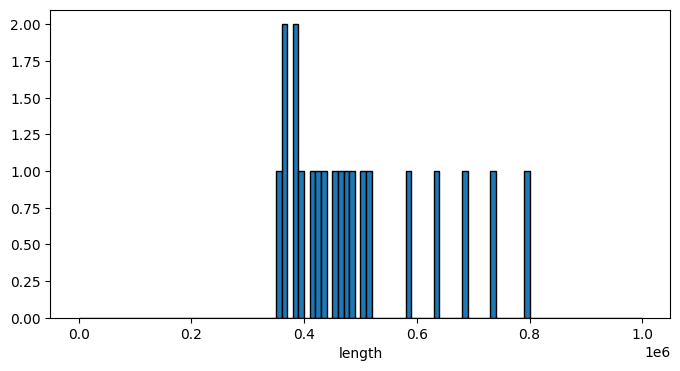

In [16]:
# 3.2) what are the 20 most frequent words? (Plot the distribution of these words)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
ax.hist(top_20_CL.values().collect(), bins=100, range=(0, 1000000), edgecolor='black')
ax.set_xlabel('length')
top_20_CL.values().collect()

Text(0.5, 0, 'length')

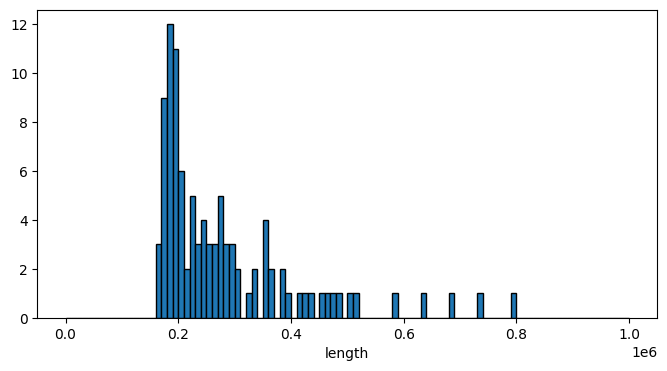

In [17]:
# 3.2) what are the 100 most frequent words? (Plot the distribution of these words)
top_100 = top_words_CL.take(100)
top_100 = sc.parallelize(top_100)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
ax.hist(top_100.values().collect(), bins=100, range=(0, 1000000), edgecolor='black')
ax.set_xlabel('length')

Text(0.5, 0, 'length')

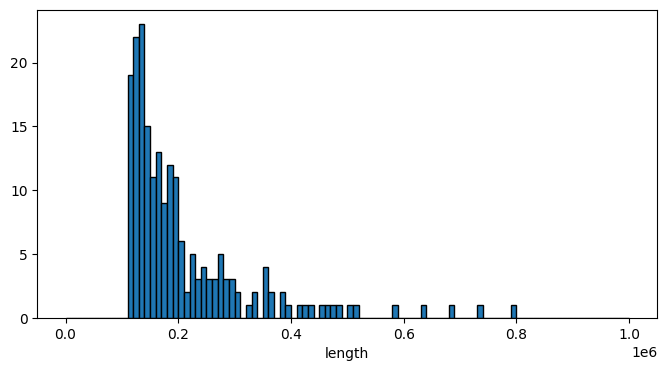

In [18]:
# 3.2) what are the 200 most frequent words? (Plot the distribution of these words)
top_200 = top_words_CL.take(200)
top_200 = sc.parallelize(top_200)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
ax.hist(top_200.values().collect(), bins=100, range=(0, 1000000), edgecolor='black')
ax.set_xlabel('length')

Text(0.5, 0, 'length')

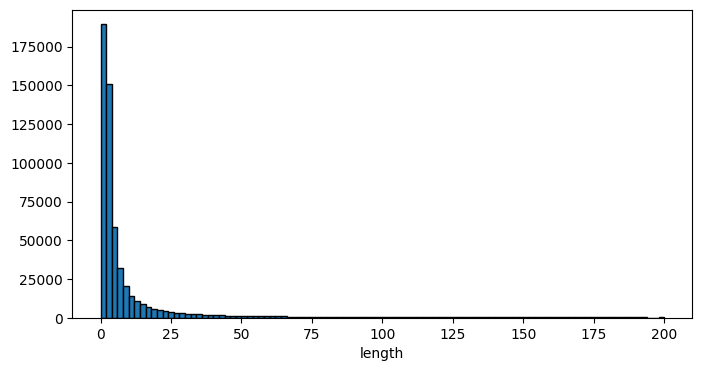

In [19]:
# 3.2) what are the most frequent words? (Plot the distribution of these words)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
ax.hist(top_words_CL.values().collect(), bins=100, range=(0, 200), edgecolor='black')
ax.set_xlabel('length')

In [20]:
# 3.3) find the word clouds of the news.
#      you need to use keywords field.
#      score = 2^log10(count)( count is the number of the each keyword)
#      you should normalize scores.
#      use wordcloud package for showing the result.

cloudword_counts = data.map(json.loads).flatMap(
    lambda x: [(k, 1) for k in x.get('keywords', [])]
).reduceByKey(add)

cloudword_scores = cloudword_counts.map(
    lambda x: (x[0], 2 ** np.log10(x[1]))
)

scores_sum = cloudword_counts.map(lambda x: x[1]).reduce(add)

# normalizing scores
normalized_scores = cloudword_counts.map(lambda x: (x[0], x[1]/scores_sum))
normalized_scores.take(10)

[('دانشگاه صنعتی امیرکبیر', 4.01781425790788e-05),
 ('فلسطینی', 0.000668783446020848),
 ('جشنواره بین المللی سائوپائولو برزیل', 2.1915350497679346e-06),
 ('مقاومت', 0.0004463426384694027),
 ('سازمان بهزیستی', 0.0001709397338818989),
 ('سرپرست گروه اعزامی جمعیت هلال احمر ایران', 1.4610233665119564e-06),
 ('سرمربی تیم ملی فرانسه', 1.3149210298607608e-05),
 ('امویام X۵۵ پرو', 7.305116832559782e-07),
 ('شاهرخ', 1.205344277372364e-05),
 ('رئیس ستاد ارتش آمریکا', 3.287302574651902e-06)]

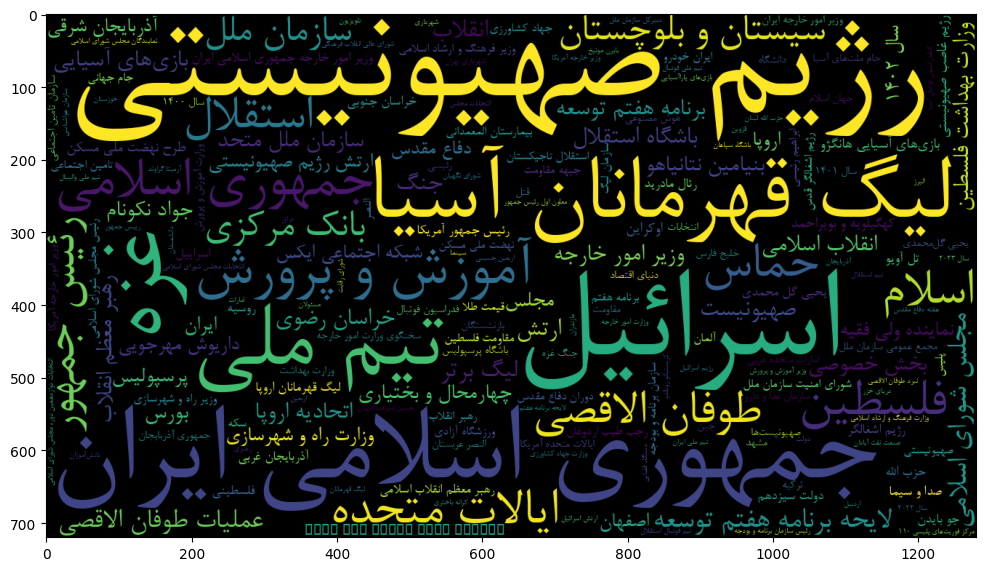

In [21]:
from PIL import Image
from wordcloud import WordCloud
from matplotlib import pyplot as plt

frequencies = {
    word: freq for (word, freq) in normalized_scores.collect()
}

plt.figure(figsize=(12, 8))
wc = WordCloud(
    font_path='./fonts/B-NAZANIN.TTF',
    width=1280,
    height=720,
    colormap='viridis'
).generate_from_frequencies(frequencies)
plt.imshow(wc)
plt.show()


In [22]:
# 3.4) plot a timeline which shows total count of news per each day.

# import our needed libraries
from datetime import datetime

ts = 1703111831
datetime.utcfromtimestamp(ts).replace(hour=0, minute=0, second=0)

datetime.datetime(2023, 12, 20, 0, 0)

In [23]:
import json

json.loads(data.take(1)[0]).keys()

# articles_cleaned_rdd.take(1)
# stem plot

dict_keys(['body', 'image_title_url', 'language', 'source', 'title', 'date_published', 'uid', 'url', 'crawler_timestamp', 'ingestor_timestamp', 'summary', 'hostname', 'parser_categories', 'keywords', 'parser_keyword', 'author', 'processed_body', 'categories', 'ner_tags'])

In [24]:
from datetime import datetime

def convert_date(x):
    date = x['date_published']
    date = datetime.fromtimestamp(date).replace(hour=0, minute=0, second=0)
    x['day'] = date
    return x

abas = data.map(json.loads).map(convert_date)
abas.take(1)




[{'body': 'سرمربی ملوان درباره تصاویر وایرالی دیدار با نساجی یک پست جالب منتشر کرد.\n\nبه گزارش "ورزش سه"، مهدی تارتار با خوشحالی عجیب و غریب دقیقه ۹۰+۳ یکی از چهرههای جالب این هفته لیگ برتر را به خود اختصاص داد که موردتوجه هواداران فوتبال قرار گرفت.\n\nتارتار حالا با انتشار یک پست اینستاگرامی از تصاویر جشن و خوشحالی خود نوشته که این جادوی طرفداران انزلی است که او را از خود بی خود کرده است.\n\nسرمربی ملوان همچنین وعده داده که تیمش در ادامه فصل نیز با تمام توان خواهد جنگید تا رضایت هواداران را به خود جلب کند.\n\nنوشته او را در ادامه میخوانید:\n\nحالا که به عکسها نگاه میکنم، متحیر میشوم. یادم نمیآید هرگز اینطور شوری گرفته باشم. این جادوی شماست، شما که روی سکو آنچنان حس و انرژی به ما میدهید که لحظه پیروزی برایمان وصفناشدنی باشد. از روی سکوها تا لب خط، از پای تلویزیونها تا در مستطیل سبز؛ ما همدل و یکصدا پیش میرویم. باهم میجنگیم و باهم میخندیم و هرروز تلاش میکنیم تا این خنده را روی صورت شما نگه داریم. این پیروزی برای شماست، شما مردان نیک روی چمن و شما مردمان نیک روی سکو \U0001fa75🤍',
  'ima

In [25]:
news_pers_day = abas.map(lambda x: (x['day'], 1)).reduceByKey(add)

news_pers_day_sorted = news_pers_day.sortBy(lambda x: x[0], ascending=False)
news_pers_day_sorted.take(100)

[(datetime.datetime(2023, 11, 6, 0, 0), 2069),
 (datetime.datetime(2023, 11, 5, 0, 0), 14149),
 (datetime.datetime(2023, 11, 4, 0, 0), 13234),
 (datetime.datetime(2023, 11, 3, 0, 0), 10496),
 (datetime.datetime(2023, 11, 2, 0, 0), 9565),
 (datetime.datetime(2023, 11, 1, 0, 0), 13979),
 (datetime.datetime(2023, 10, 31, 0, 0), 13506),
 (datetime.datetime(2023, 10, 30, 0, 0), 13716),
 (datetime.datetime(2023, 10, 29, 0, 0), 13583),
 (datetime.datetime(2023, 10, 28, 0, 0), 13147),
 (datetime.datetime(2023, 10, 27, 0, 0), 10469),
 (datetime.datetime(2023, 10, 26, 0, 0), 8856),
 (datetime.datetime(2023, 10, 25, 0, 0), 13026),
 (datetime.datetime(2023, 10, 24, 0, 0), 13522),
 (datetime.datetime(2023, 10, 23, 0, 0), 12149),
 (datetime.datetime(2023, 10, 22, 0, 0), 13276),
 (datetime.datetime(2023, 10, 21, 0, 0), 12576),
 (datetime.datetime(2023, 10, 20, 0, 0), 9809),
 (datetime.datetime(2023, 10, 19, 0, 0), 8266),
 (datetime.datetime(2023, 10, 18, 0, 0), 12965),
 (datetime.datetime(2023, 10, 1

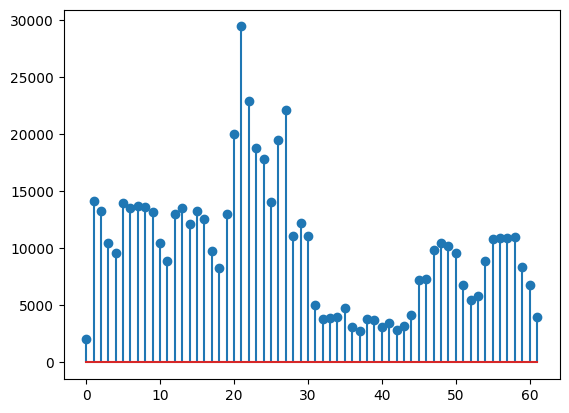

In [26]:

plt.stem(news_pers_day_sorted.values().collect())
plt.show()

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from itertools import chain
import random
from tqdm.notebook import tqdm

In [28]:
def extract_items(page):
    uid = page['uid']
    date = datetime.fromtimestamp(page['date_published'])
    date = date.replace(hour=0, minute=0, second=0)
    words = page['body'].strip().split(' ')
    result = ((uid, date), words)
    return result


baskets_rdd = articles_cleaned_rdd.map(extract_items)
# baskets_rdd.take(1)

# a = [
#     'abas',
#     'hasan',
#     'gholam'
# ]

# name2idx = {
#     name: idx for name, idx in zip(a, range(len(a)))
# }

# name2idx

# idx2name = {
#     v: k for k, v in name2idx.items()
# }

# idx2name


In [29]:
# finding frequent items (words)
item_counts_rdd = baskets_rdd.flatMap(lambda x: [(item, 1) for item in x[1]])
item_counts_rdd = item_counts_rdd.reduceByKey(lambda x, y: x + y)
item_counts_rdd.top(5, key=lambda x: x[1])

[('خود', 7848), ('گفت', 7353), ('ایران', 6742), ('سال', 6321), ('کشور', 5975)]

Text(0.5, 0, 'Number of words')

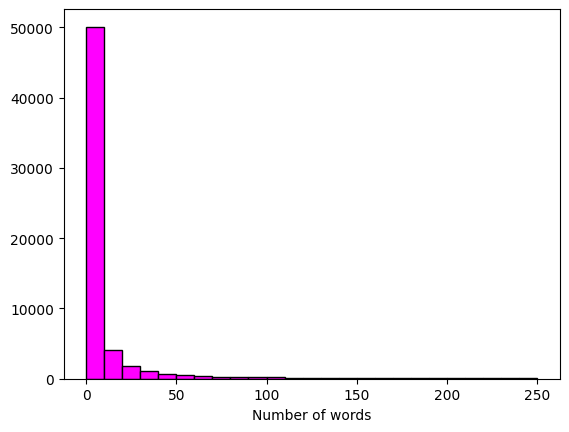

In [30]:
# plot histogram of words to get sense of data distribution
plt.hist(item_counts_rdd.values().collect(), edgecolor='black', color='magenta', bins=25, range=(0, 250));
plt.xlabel('Number of words')

In [39]:
# we let threshold be 80th percentile of the item counts
item_counts = item_counts_rdd.values().collect()
SUPPORT_THRESHOLD = int(np.quantile(item_counts, 0.9))
SUPPORT_THRESHOLD = 1000
print(f'80th percentile of the item supports: {SUPPORT_THRESHOLD}')


80th percentile of the item supports: 1000


In [32]:
# keys of baskets_rdd is not needed anymore
baskets_rdd = baskets_rdd.values()

In [33]:
def find_frequent_items(baskets_rdd, st):
    frequent_items_rdd = baskets_rdd.flatMap(lambda x: [(item, 1) for item in x]) \
    .reduceByKey(lambda x, y: x + y) \
    .filter(lambda x: x[1] >= st)
    return frequent_items_rdd

def remove_infrequent(basket):
    return [item for item in basket if item in frequent_items.value]

def remove_infrequent_items(baskets_rdd):
    return baskets_rdd.map(remove_infrequent).filter(lambda x: len(x) > 0)
    
def find_two_tuples(basket):
    l = len(basket)
    two_tuples = set()
    for i in range(l):
        for j in range(i+1, l):
            if len((frozenset([basket[i], basket[j]]))) == 2:
                two_tuples.add((frozenset([basket[i], basket[j]]), 1))
    return two_tuples

def find_frequent_two_tuples(baskets_rdd, st):
    two_tuple_counts_rdd = baskets_rdd.flatMap(find_two_tuples)
    two_tuple_counts_rdd = two_tuple_counts_rdd.reduceByKey(lambda x, y: x + y)
    return two_tuple_counts_rdd.filter(lambda x: x[1] >= st)

def find_three_tuples(basket):
    l = len(basket)
    three_tuples = set()
    for i in range(l):
        for j in range(i+1, l):
            for k in range(j+1, l):
                if len(frozenset([basket[i], basket[j], basket[k]])) == 3 \
                and frozenset([basket[i], basket[j]]) in frequent_two_tuples.value \
                and frozenset([basket[j], basket[k]]) in frequent_two_tuples.value \
                and frozenset([basket[i], basket[k]]) in frequent_two_tuples.value:
                    three_tuples.add((frozenset([basket[i], basket[j], basket[k]]), 1))
    return three_tuples

def find_frequent_three_tuples(baskets_rdd, st):
    three_tuple_counts_rdd = baskets_rdd.flatMap(find_three_tuples)
    three_tuple_counts_rdd = three_tuple_counts_rdd.reduceByKey(lambda x, y: x + y)
    return three_tuple_counts_rdd.filter(lambda x: x[1] >= st)

In [40]:
# A-priori

# find frequent items
frequent_items_rdd = find_frequent_items(baskets_rdd, st=SUPPORT_THRESHOLD)

# broadcast frequent cameras so that it can be used in map operations on all machines
print(f'There are {frequent_items_rdd.count()} frequent items in the dataset')
print('most frequent items (item, count): ')
print(frequent_items_rdd.top(10, key=lambda x: x[1]))
print('-' * 80)
frequent_items = sc.broadcast(frozenset(frequent_items_rdd.keys().collect()))

# remove infrequent items from the baskets
baskets_without_infrequent_rdd = remove_infrequent_items(baskets_rdd)

# find frequent two-tuples
frequent_two_tuples_rdd = find_frequent_two_tuples(baskets_without_infrequent_rdd, st=SUPPORT_THRESHOLD)
print(f'There are {frequent_two_tuples_rdd.count()} frequent two-tuples in the dataset')
print('most frequent two-tuples (item, count): ')
print(frequent_two_tuples_rdd.top(10, key=lambda x: x[1]))
print('-' * 80)
frequent_two_tuples = sc.broadcast(frozenset(frequent_two_tuples_rdd.keys().collect()))

# find frequent three-tuples
frequent_three_tuples_rdd = find_frequent_three_tuples(baskets_without_infrequent_rdd, st=SUPPORT_THRESHOLD)
print(f'There are {frequent_three_tuples_rdd.count()} frequent three-tuples in the dataset')
print('most frequent three-tuples (item, count): ')
print(frequent_three_tuples_rdd.top(10, key=lambda x: x[1]))

There are 237 frequent items in the dataset
most frequent items (item, count): 


[('خود', 7848), ('گفت', 7353), ('ایران', 6742), ('سال', 6321), ('کشور', 5975), ('ما', 5152), ('گزارش', 5015), ('باید', 4765), ('میشود', 4762), ('قرار', 4758)]
--------------------------------------------------------------------------------


There are 71 frequent two-tuples in the dataset
most frequent two-tuples (item, count): 


[(frozenset({'خود', 'گزارش'}), 1919), (frozenset({'گفت', 'گزارش'}), 1911), (frozenset({'گفت', 'خود'}), 1619), (frozenset({'گفت', 'افزود'}), 1571), (frozenset({'گفت', 'ادامه'}), 1562), (frozenset({'قرار', 'گزارش'}), 1548), (frozenset({'قرار', 'خود'}), 1470), (frozenset({'ادامه', 'گزارش'}), 1469), (frozenset({'گفت', 'اینکه'}), 1415), (frozenset({'کشور', 'گزارش'}), 1405)]
--------------------------------------------------------------------------------


There are 3 frequent three-tuples in the dataset
most frequent three-tuples (item, count): 


[(frozenset({'گفت', 'خود', 'گزارش'}), 1062), (frozenset({'گفت', 'ادامه', 'گزارش'}), 1042), (frozenset({'گفت', 'افزود', 'گزارش'}), 1025)]


In [114]:
baskets_without_infrequent_rdd.flatMap(find_two_tuples).reduceByKey(add).count()

12766318

In [41]:
# SON

# partitioning dataset into smaller chunks
N = 3    # number of data chunks

def hash_baskets(basket):
    n = np.random.randint(0, N)
    return (n, basket)

hashed_baskets = baskets_without_infrequent_rdd.map(hash_baskets)
hashed_baskets.take(5)

[(1,
  ['سازمان',
   'فرهنگی',
   'اجتماعی',
   'سفر',
   'خبر',
   'ادامه',
   'توسط',
   'سازمان',
   'تولید',
   'روز',
   'سه',
   'ساعت',
   'کشور',
   'میشود',
   'بیش',
   'سال',
   'بعد',
   'مختلف',
   'جمله',
   'تهران',
   'شهر',
   'توسط',
   'گروه',
   'میشود',
   'گزارش',
   'سال',
   'آغاز',
   'دلیل',
   'سال']),
 (2,
  ['به',
   'گزارش',
   'خبرگزاری',
   'فارس',
   'امروز',
   'شهرستان',
   'اظهار',
   'کل',
   'شهرستان',
   'امسال',
   'زمین',
   'حدود',
   'تولید',
   'شهرستان',
   'کشورهای',
   'میشود',
   'افزود',
   'کل',
   'شهرستان',
   'میشود',
   'شهرستان',
   'ادامه',
   'مهر',
   'ماه',
   'منطقه',
   'آغاز',
   'میشود',
   'شهرستان',
   'دلیل',
   'شرایط',
   'آب',
   'تولید',
   'تصریح',
   'بیش',
   'هزار',
   'نفر',
   'تولید',
   'شهرستان',
   'کار',
   'پایان']),
 (0,
  ['سال',
   'قرار',
   'بودند',
   'پیش',
   'چند',
   'ساعت',
   'بعد',
   'خبر',
   'دلیل',
   'دست',
   'روز',
   'آغاز',
   'گفت',
   'ما',
   'هیچ',
   'ما',
   'روز',
   'روز',
  

In [ ]:
# first pass of the SON: finding frequent items, two-tuples and three-tuples
chunk_numbers = hashed_baskets.keys().distinct().collect()
freq_item_candidates = set()
freq_two_tuple_candidates = set()
freq_three_tuple_candidates = set()

for i in chunk_numbers:
    sub_baskets_rdd = hashed_baskets.filter(lambda x: x[0] == i).values()
    st = 0.9 * SUPPORT_THRESHOLD / N
    
    # find frequent items
    frequent_items_rdd = find_frequent_items(sub_baskets_rdd, st=st)
    # broadcast frequent cameras so that it can be used in map operations on all machines
    frequent_items = sc.broadcast(frozenset(frequent_items_rdd.keys().collect()))
    freq_item_candidates = freq_item_candidates.union(set(frequent_items.value))
    # remove infrequent items from the baskets
    baskets_without_infrequent_rdd = remove_infrequent_items(baskets_rdd)
    # find frequent two-tuples
    frequent_two_tuples_rdd = find_frequent_two_tuples(baskets_without_infrequent_rdd, st=st)
    frequent_two_tuples = sc.broadcast(frozenset(frequent_two_tuples_rdd.keys().collect()))
    freq_two_tuple_candidates = freq_two_tuple_candidates.union(frequent_two_tuples_rdd.keys().collect())
    # find frequent three-tuples
    frequent_three_tuples_rdd = find_frequent_three_tuples(baskets_without_infrequent_rdd, st=st)
    freq_three_tuple_candidates = freq_three_tuple_candidates.union(frequent_three_tuples_rdd.keys().collect())

In [ ]:
# second pass of the SON algorithm: counting exact amount of occurance in the whole data
freq_item_candidates = sc.broadcast(freq_item_candidates)
freq_two_tuple_candidates = sc.broadcast(freq_two_tuple_candidates)
freq_three_tuple_candidates = sc.broadcast(freq_three_tuple_candidates)

In [ ]:
def count_freq_candidates(basket):
    return [(item, 1) for item in basket if item in freq_item_candidates.value]

def count_two_tuple_candidates(basket):
    two_tuples = []
    for item in freq_two_tuple_candidates.value:
        basket_copy = basket.copy()
        try:
            for i in item:
                basket_copy.remove(i)
            two_tuples.append((item, 1))
        except:
            pass
    return two_tuples

def count_three_tuple_candidates(basket):
    three_tuples = []
    for item in freq_three_tuple_candidates.value:
        basket_copy = basket.copy()
        try:
            for i in item:
                basket_copy.remove(i)
            three_tuples.append((item, 1))
        except:
            pass
    return three_tuples

In [ ]:
# find frequent items
freq_item_counts = baskets_rdd.flatMap(count_freq_candidates).reduceByKey(lambda x, y: x + y) \
.filter(lambda x: x[1] >= SUPPORT_THRESHOLD)
print(f'There are {freq_item_counts.count()} frequent single items in the dataset')
print(f'Most frequent single items: ')
print(freq_item_counts.top(10, key=lambda x: x[1]))

# find frequent two-tuples
freq_two_tuple_counts = baskets_rdd.flatMap(count_two_tuple_candidates).reduceByKey(lambda x, y: x + y) \
.filter(lambda x: x[1] >= SUPPORT_THRESHOLD)
print(f'There are {freq_two_tuple_counts.count()} frequent two-tuples in the dataset')
print('Most frequent two-tuples: ')
print(freq_two_tuple_counts.top(10, key=lambda x: x[1]))

# find frequent three-tuples
freq_three_tuple_counts = baskets_rdd.flatMap(count_three_tuple_candidates).reduceByKey(lambda x, y: x + y) \
.filter(lambda x: x[1] >= SUPPORT_THRESHOLD)
print(f'There are {freq_three_tuple_counts.count()} frequent three-tuples in the dataset')
print('Most frequent three-tuples: ')
print(freq_three_tuple_counts.top(10, key=lambda x: x[1]))

## HW2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
import random

In [3]:
spark = SparkSession \
    .builder \
    .appName("Spark Processor") \
    .master("local[*]") \
    .getOrCreate()

sc = spark.sparkContext

24/01/08 17:52:05 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [5]:
df = spark.read.csv('SampleData.csv', header=True)
df.show(10)

+-----------+---------+---------------+-------------+----------------+----------+-------------------+
|DEVICE_CODE|SYSTEM_ID|ORIGINE_CAR_KEY|FINAL_CAR_KEY|CHECK_STATUS_KEY|COMPANY_ID|      PASS_DAY_TIME|
+-----------+---------+---------------+-------------+----------------+----------+-------------------+
|  100700853|      283|        9016704|      9016704|               5|       264|2022-01-08 00:00:39|
|     230204|       81|        9017538|      9017538|               5|       161|2022-01-08 00:38:48|
|     631357|       81|        9017538|      9017538|               5|       161|2022-01-08 00:13:50|
|     900164|      283|        9035020|      9035020|               5|       264|2022-01-08 00:27:38|
|     900149|      283|        9020900|      9020900|               5|       264|2022-01-08 00:40:08|
|     900246|      283|        9021792|      9021792|               5|       264|2022-01-08 00:55:51|
|  100700871|      283|        9021792|      9021792|               5|       264|2

In [6]:
# removing outliers
df = df.filter(df['ORIGINE_CAR_KEY'] == df['FINAL_CAR_KEY'])

In [7]:
# select desired columns
df = df.select('DEVICE_CODE', 'FINAL_CAR_KEY', 'PASS_DAY_TIME')
df.show(10)

+-----------+-------------+-------------------+
|DEVICE_CODE|FINAL_CAR_KEY|      PASS_DAY_TIME|
+-----------+-------------+-------------------+
|  100700853|      9016704|2022-01-08 00:00:39|
|     230204|      9017538|2022-01-08 00:38:48|
|     631357|      9017538|2022-01-08 00:13:50|
|     900164|      9035020|2022-01-08 00:27:38|
|     900149|      9020900|2022-01-08 00:40:08|
|     900246|      9021792|2022-01-08 00:55:51|
|  100700871|      9021792|2022-01-08 01:07:52|
|     900235|      9021792|2022-01-08 01:06:44|
|  100701059|      9038947|2022-01-08 00:47:59|
|     631765|      9024221|2022-01-08 01:04:11|
+-----------+-------------+-------------------+
only showing top 10 rows



In [9]:
device_codes_rdd = df.select('DEVICE_CODE').distinct() \
.rdd.map(lambda x: x['DEVICE_CODE']).sortBy(lambda x: int(x))

In [10]:
device_codes_dict = sc.broadcast({code: idx for idx, code in enumerate(device_codes_rdd.collect())})

In [11]:
# make rdd out of dataframe

def date_hash(date, n=1):
    minute = slice(-2, None)
    date = list(date)
    date[minute] = '{:02d}'.format(n * (int(''.join(date[minute])) // n)).split()
    return ''.join(date)

def create_key_value(example):
    key = (example['FINAL_CAR_KEY'], date_hash(example['PASS_DAY_TIME'][:-3], 5))
    value = example['DEVICE_CODE']
    return (key, value)

data_rdd = df.rdd.map(create_key_value)
data_rdd.take(10)

[(('9016704', '2022-01-08 00:00'), '100700853'),
 (('9017538', '2022-01-08 00:35'), '230204'),
 (('9017538', '2022-01-08 00:10'), '631357'),
 (('9035020', '2022-01-08 00:25'), '900164'),
 (('9020900', '2022-01-08 00:40'), '900149'),
 (('9021792', '2022-01-08 00:55'), '900246'),
 (('9021792', '2022-01-08 01:05'), '100700871'),
 (('9021792', '2022-01-08 01:05'), '900235'),
 (('9038947', '2022-01-08 00:45'), '100701059'),
 (('9024221', '2022-01-08 01:00'), '631765')]

In [12]:
# we consider the following basket-items:
# basket: (plate, date), items: camera code
baskets_rdd = data_rdd.groupBy(lambda x: x[0]) \
.mapValues(lambda x: list({item[1] for item in list(x)}))
baskets_rdd.top(2, key=lambda x: len(x[1]))

[(('8073331', '2022-01-08 17:55'),
  ['22009834',
   '63188201',
   '635693',
   '22010056',
   '22010059',
   '631610',
   '22010054',
   '631634',
   '22009831',
   '22010053',
   '22009830',
   '22010055',
   '22009915',
   '635697',
   '22009829',
   '22010072',
   '22010079',
   '22010077',
   '22010058',
   '635695',
   '635696']),
 (('8073331', '2022-01-08 17:25'),
  ['22009834',
   '63188201',
   '22009832',
   '22010056',
   '22010059',
   '22010054',
   '22010052',
   '22010071',
   '22009831',
   '22010053',
   '22000601',
   '22000701',
   '22010080',
   '22009830',
   '22010055',
   '22009829',
   '22010072',
   '22010079',
   '22010058'])]

In [13]:
def flatten(lis):
    if isinstance(lis, list):
        for item in lis:
            yield from flatten(item)
    else:
        yield lis

In [14]:
baskets_rdd = baskets_rdd.groupBy(lambda x: (x[0][0], x[0][1].split(' ')[0])) \
.mapValues(lambda x: list(flatten([item[1] for item in list(x)])))
baskets_rdd.map(lambda x: len(x[1])).top(5)

[3150, 2093, 83, 82, 80]

In [15]:
# removing outliers
baskets_rdd = baskets_rdd.filter(lambda x: len(x[1]) <= 1000)

In [16]:
baskets_rdd.top(5)

[(('99999901', '2022-01-08'), ['100700853']),
 (('9999977', '2022-01-08'), ['900211']),
 (('9999970', '2022-01-08'), ['150']),
 (('9999966', '2022-01-08'), ['900268']),
 (('9999960', '2022-01-08'), ['22009972', '202901', '900191', '175'])]

In [17]:
# Create binary vectors indicating presence of a particular camera in devices
def vectorize(example):
    vector_value = np.zeros(len(device_codes_dict.value))
    indexes = [device_codes_dict.value[code] for code in example[1]]
    vector_value[indexes] = 1
    return *example, vector_value

inputs_rdd = baskets_rdd.map(vectorize)

In [18]:
def cosine_sim(a: np.ndarray, b: np.ndarray):
    result = np.sum(a * b)
    result = np.arctan2(result, np.linalg.norm(a) * np.linalg.norm(b))
    return np.round(result, 3)

In [19]:
# We choose a random path consisting of random number of devices
path_lengths = baskets_rdd.map(lambda x: len(x[1])).collect()

In [20]:
num_devices = int(np.std(path_lengths) * np.random.rand() + np.mean(path_lengths))

In [21]:
query_path = np.random.choice(list(device_codes_dict.value.keys()), size=num_devices)

In [22]:
query_path_vector = np.zeros(len(device_codes_dict.value))
query_path_vector[[device_codes_dict.value[code] for code in query_path]] = 1
query_path_vector = sc.broadcast(query_path_vector)

In [23]:
def calculate_simularity(example):
    similarity = cosine_sim(example[2], query_path_vector.value)
    return (example[0], example[1], similarity)


path_similarities_rdd = inputs_rdd.map(calculate_simularity)

In [24]:
print('query path: ')
print(query_path)

query path: 
['22010080' '22009972']


In [25]:
path_similarities_rdd.top(5, key=lambda x: x[2])

[(('10342868', '2022-01-08'), ['22009972', '22009971', '22010080'], 0.685),
 (('27110893', '2022-01-08'), ['22010080'], 0.615),
 (('26215040', '2022-01-08'), ['22010080'], 0.615),
 (('8976450', '2022-01-08'), ['22009972'], 0.615),
 (('9885700', '2022-01-08'), ['22010080'], 0.615)]

In [26]:
def sign(x):
    return 1.0 if x>=0 else -1.0

In [27]:
# random hyperplanes of -1 and 1s
num_bands = 20
num_rows = 2
num_hashes = num_bands * num_rows
num_bands = sc.broadcast(num_bands)
num_rows = sc.broadcast(num_rows)
hyperplanes = [np.random.choice([-1, 1], len(device_codes_dict.value)) for _ in range(num_hashes)]

In [28]:
query_path_signature = np.array([sign(sum(query_path_vector.value * hyperplane)) for hyperplane in hyperplanes])

In [29]:
# generate signature matrix
def generate_signature(example):
    signature = np.zeros(len(hyperplanes.value))
    for i, hp in enumerate(hyperplanes.value):
        signature[i] = sign(sum(hp * example[2]))
    return *example, signature

signatures_rdd = inputs_rdd.map(generate_signature)

In [30]:
query_path_signature = sc.broadcast(query_path_signature)
signatures_rdd.take(1)

24/01/08 18:08:34 ERROR Executor: Exception in task 0.0 in stage 24.0 (TID 113)]
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/opt/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/opt/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/spark-3.5.0-bin-hadoop3/python/pyspark/rdd.py", line 2849, in takeUpToNumLeft
    yield next(iterator)
  File "/opt/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
  File "/tmp/ipykernel_7008/3499990637.py", line 3, in generate_signature
AttributeError: 'list' object has no attribute 'value'

	at org.apache.spark.api.python.BasePythonRun

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 24.0 failed 1 times, most recent failure: Lost task 0.0 in stage 24.0 (TID 113) (192.168.166.235 executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/opt/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/opt/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/spark-3.5.0-bin-hadoop3/python/pyspark/rdd.py", line 2849, in takeUpToNumLeft
    yield next(iterator)
  File "/opt/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
  File "/tmp/ipykernel_7008/3499990637.py", line 3, in generate_signature
AttributeError: 'list' object has no attribute 'value'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$runJob$1(PythonRDD.scala:181)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2438)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2844)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2780)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2779)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2779)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1242)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3048)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2982)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2971)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:984)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:181)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/opt/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/opt/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/spark-3.5.0-bin-hadoop3/python/pyspark/rdd.py", line 2849, in takeUpToNumLeft
    yield next(iterator)
  File "/opt/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
  File "/tmp/ipykernel_7008/3499990637.py", line 3, in generate_signature
AttributeError: 'list' object has no attribute 'value'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$runJob$1(PythonRDD.scala:181)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2438)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [31]:
# find examples being mapped to the same bucket as the query signature (AND-OR construction)
def send_to_buckets(example):
    is_candidate = False
    for b in range(num_bands.value):
        indexes = slice(b*num_rows.value, (b+1)*num_rows.value)
        if np.sum(example[3][indexes] == query_path_signature.value[indexes]):
            is_candidate = True
            break

    return example[0], example[1], example[2], is_candidate
    
candidate_status_rdd = signatures_rdd.map(send_to_buckets)

In [32]:
candidates_rdd = candidate_status_rdd.filter(lambda x: x[3]).map(lambda x: (x[0], x[1], x[2]))